<a href="https://colab.research.google.com/github/Serena-24/NativeSoftTech-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Tensorflow

import tensorflow as tf
from tensorflow import keras

#PyTorch

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms

#Numpy

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#TensorFlow - Getting and Splitting the Dataset

fashion_mnist = keras.datasets.fashion_mnist
(train_images_tf, train_labels_tf), (test_images_tf, test_labels_tf) = fashion_mnist.load_data()


#PyTorch - Getting and Splitting the Dataset

transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset_pytorch = torchvision.datasets.FashionMNIST(root='./data/',
                                             train=True,
                                             transform=transforms,
                                             download=True)
test_dataset_pytorch = torchvision.datasets.FashionMNIST(root='.data/',
                                             train=False,
                                             transform=transforms,
                                             download=True)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 5.95MB/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 59.0MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.2MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 26.4M/26.4M [00:00<00:00, 114MB/s]


Extracting .data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 5.73MB/s]

Extracting .data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 56.5MB/s]


Extracting .data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.0MB/s]

Extracting .data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



9


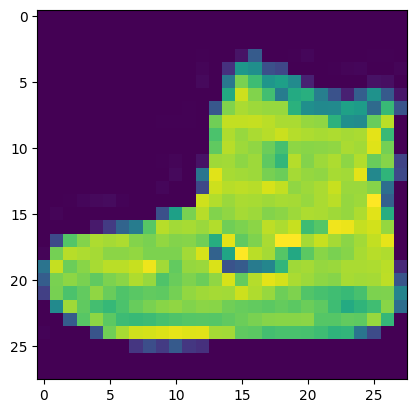

In [3]:
#TensorFlow - Loading the Data
def imshowTensorFlow(img):
  plt.imshow(img)
imshowTensorFlow(train_images_tf[0])

print(train_labels_tf[0])


In [8]:
#PyTorch - Loading the Data
def imshowPytorch(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
train_loader = torch.utils.data.DataLoader(dataset=train_dataset_pytorch,
                                           batch_size=32,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset_pytorch,
                                           batch_size=32,
                                           shuffle=False)

data_iter = iter(train_loader)
images, label = data_iter.next()
imshowPytorch(torchvision.utils.make_grid(images[0]))
print(label[0])

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [ ]:
#TensorFlow - Building the Model
modeltf = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1), filters=6, kernel_size=5, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, padding="same", activation=tf.nn.relu),
    keras.layers.AveragePooling2D(pool_size=2, strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation=tf.nn.relu),
    keras.layers.Dense(84, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#PyTorch - Building the Model
class NeuralNet(nn.Module):
    def __init__(self, num_of_class):
        super(NeuralNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2))
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
        )
        self.classifier = nn.Linear(84, 10)

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(-1, 16*5*5)
        x = self.fc_model(x)
        x = self.classifier(x)
        return x

In [ ]:
#TensorFlow
modeltf.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
modeltf.summary()

#PyTorch
modelpy = NeuralNet(10)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(modelpy.parameters())

modelpy

In [ ]:
#TensorFlow
train_images_tensorflow = (train_images_tf / 255.0).reshape(train_images_tf.shape[0], 28, 28, 1)
test_images_tensorflow = (test_images_tf / 255.0).reshape(test_images_tf.shape[0], 28, 28 ,1)
train_labels_tensorflow=keras.utils.to_categorical(train_labels_tf)
test_labels_tensorflow=keras.utils.to_categorical(test_labels_tf)

modeltf.fit(train_images_tensorflow, train_labels_tensorflow, epochs=30, batch_size=32)

#PyTorch
for e in range(30):
    # define the loss value after the epoch
    losss = 0.0
    number_of_sub_epoch = 0

    # loop for every training batch (one epoch)
    for images, labels in train_loader:
        #create the output from the network
        out = modelpy(images)
        # count the loss function
        loss = criterion(out, labels)
        # in pytorch you have assign the zero for gradien in any sub epoch
        optim.zero_grad()
        # count the backpropagation
        loss.backward()
        # learning
        optim.step()
        # add new value to the main loss
        losss += loss.item()
        number_of_sub_epoch += 1
    print("Epoch {}: Loss: {}".format(e, losss / number_of_sub_epoch))

In [7]:
#TensorFlow
predictions = modeltf.predict(test_images_tensorflow)
correct = 0
for i, pred in enumerate(predictions):
  if np.argmax(pred) == test_labels_tf[i]:
    correct += 1
print('Test Accuracy of the model on the {} test images: {}% with TensorFlow'.format(test_images_tf.shape[0],
                                                                     100 * correct/test_images_tf.shape[0]))

#PyTorch
correct = 0
total = 0
modelpy.eval()
for images, labels in test_loader:
    outputs = modelpy(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('Test Accuracy of the model on the {} test images: {}% with PyTorch'.format(total, 100 * correct // total))

NameError: name 'modeltf' is not defined